In [14]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
data = pd.read_csv('vehicle.csv')

X, y = data.drop('Class', axis=1), data.Class
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, random_state=42)

In [35]:
estimators = [
    ('GaussianNB', GaussianNB()),
    ('DecisionTree', DecisionTreeClassifier())
]

n_estimators = np.arange(10, 500, 10)

In [36]:
accuracy = {
    'GaussianNB': [],
    'DecisionTree': []
}

for title, est in estimators:
    for n in n_estimators:
        clf = AdaBoostClassifier(base_estimator=est, n_estimators=n, random_state=0).fit(train_X, train_y)
        pred_y = clf.predict(test_X)

        acc = accuracy_score(test_y, pred_y)

        accuracy[title].append(acc)

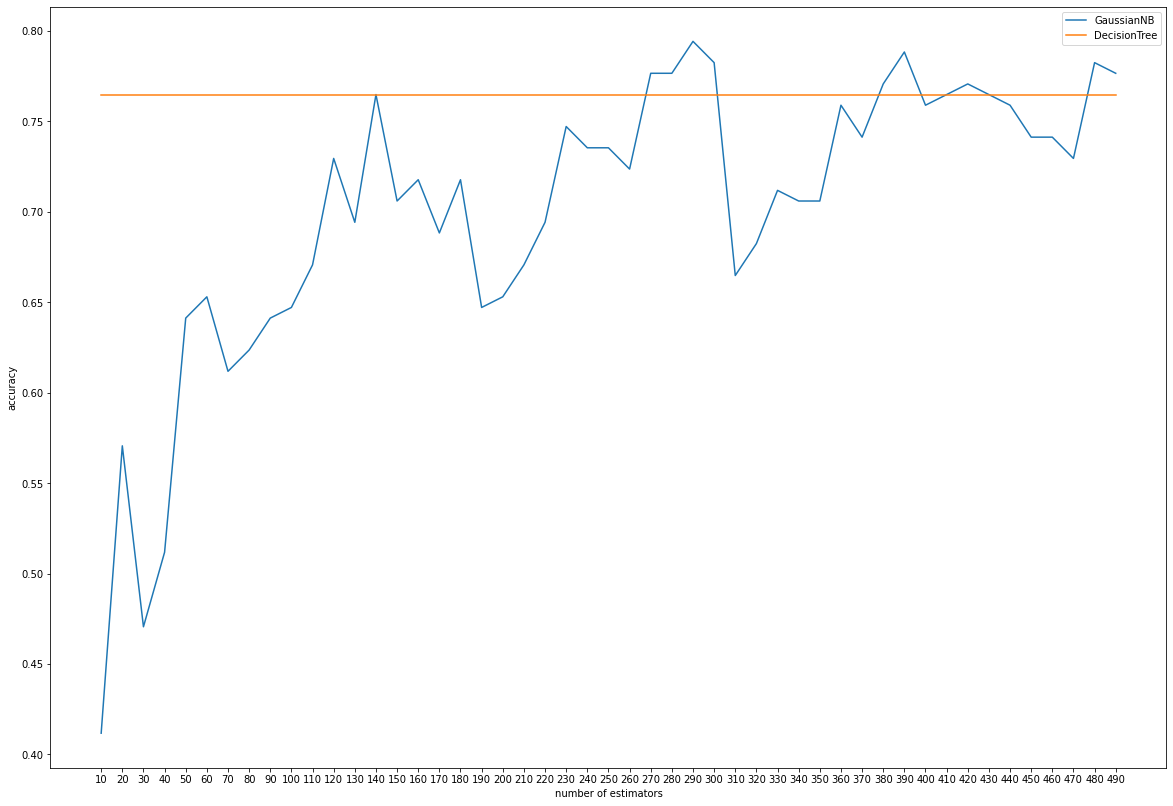

In [37]:
plt.figure(figsize=(20, 14))
for title, est in estimators:
    plt.plot(accuracy[title], label=title)

plt.xticks(range(len(n_estimators)), n_estimators)
plt.xlabel('number of estimators')
plt.ylabel('accuracy')
plt.legend(loc='best')